In [80]:
from keras_unet.models import vanilla_unet
import numpy as np

path = '/home/kuba/Desktop/Images/2~x_162~y_162~z_122~t_16us~b_be~c_-~o_R~.raw'
size = 162
imgs = 122
nbytes = 2


def readBinaryData(n,SIZE,H,nbytes):

     if nbytes==2:
         d = np.zeros((SIZE,SIZE,H),np.uint16)
     elif nbytes==1:
         d = np.zeros((SIZE,SIZE,H),np.uint8)
     else:
         print('Wrong number of bytes per voxel')
         return

     f=open(n,"rb")
     for i in range(0,H):
         for j in range(0,SIZE):
             for k in range(0,SIZE):
                 byte = f.read(nbytes)
                 if nbytes==2:
                     a = 256*byte[0] + byte[1]
                 else:
                     a = byte[0]
                 d[j,k,i] = a
     f.close()
     return d

img = readBinaryData(path, size, imgs, nbytes)
np.shape(img), img.size

((162, 162, 122), 3201768)

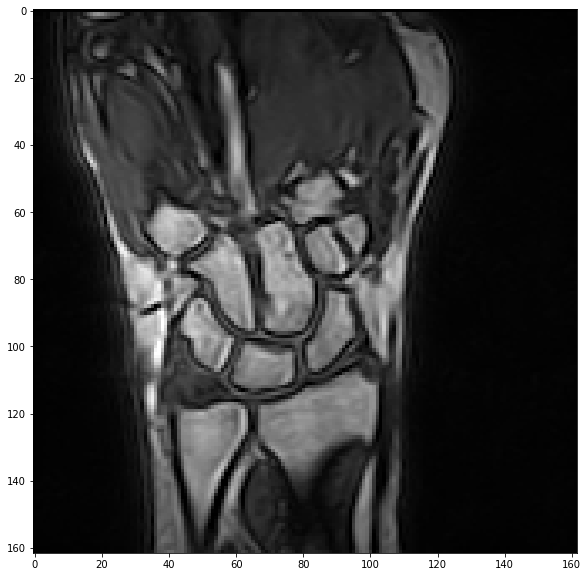

In [31]:
import matplotlib.pyplot as plt

def showImage(image, isGray=False):
     fig = plt.figure(figsize=(10, 10))
     plt.imshow(image, cmap = 'gray')
     plt.show()

showImage(img[:,:,65]) #wyświetla pierwszą warstwę z obrazu 3D d[:,:,:]

In [52]:
#extracting info about file from file name (number of image, number of images, size of images, name of image)
def get_information_from_file_names(list_of_files):
    images = []
    for names in list_of_files:
        name = names
        
        split = names.split("_")
        first_value = split[0].split("~")
        
        number_of_image = first_value[0]
        number_of_images = split[3].split("~")[0]  
        
        size_of_images = split[1][0:3]
        data = number_of_image, size_of_images, number_of_images, name
        images.append(data)
    return images

In [60]:
import os
list_of_images = os.listdir("/home/kuba/Desktop/Images/")
list_of_masks = os.listdir("/home/kuba/Desktop/Masks")

images_info = sorted(get_information_from_file_names(list_of_images))
masks_info = sorted(get_information_from_file_names(list_of_masks))

#print(images_info)
#print(masks_info)

In [78]:
#readBinaryData(path, size, imgs, nbytes)
test_img = readBinaryData("/home/kuba/Desktop/Images/"+images_info[0][3], 
                          int(images_info[0][1]), int(images_info[0][2]), 2)

test_mask = readBinaryData("/home/kuba/Desktop/Masks/"+masks_info[0][3], 
                          int(masks_info[0][1]), int(masks_info[0][2]), 1)

print(np.shape(test_img))
print(np.shape(test_mask))

(162, 162, 112)
(162, 162, 112)


In [74]:
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(162,112,1), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(test_img, test_mask)
"""

'\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\ninputs = keras.Input(shape=(162,112,1), name="digits")\nx = layers.Dense(64, activation="relu", name="dense_1")(inputs)\nx = layers.Dense(64, activation="relu", name="dense_2")(x)\noutputs = layers.Dense(10, activation="softmax", name="predictions")(x)\n\nmodel = keras.Model(inputs=inputs, outputs=outputs)\n\nmodel.compile(\n    optimizer=keras.optimizers.RMSprop(),  # Optimizer\n    # Loss function to minimize\n    loss=keras.losses.SparseCategoricalCrossentropy(),\n    # List of metrics to monitor\n    metrics=[keras.metrics.SparseCategoricalAccuracy()],\n)\n\nmodel.fit(test_img, test_mask)\n'